In [1]:
# K-NN classifier

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [6]:
#fitting KNN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
# Creating an instance of the KNeighborsClassifier class

# n_neighbors: Number of neighbors to consider when making predictions (in this case, 5)

# metric: The distance metric used for measuring the distance between data points 
# (in this case, 'minkowski')

# p: The power parameter for the 'minkowski' distance metric
# (in this case, 2, which corresponds to Euclidean distance)

classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
#predict test set result
y_pred = classifier.predict(X_test)

#making the confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_89455/3472110242.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


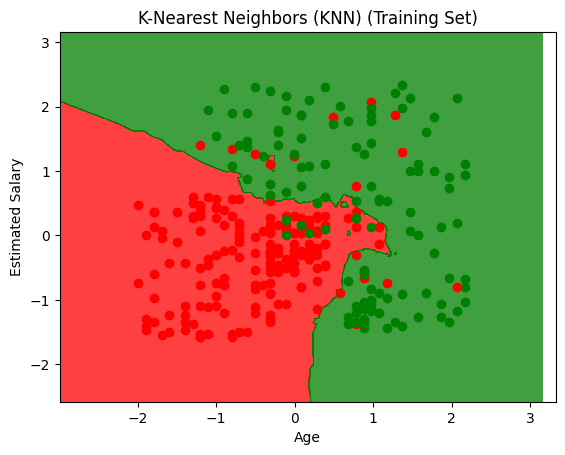

In [8]:
from matplotlib.colors import ListedColormap
# Visualizing the training set results
# Create a custom color map with two colors: red and green
cmap_custom = ListedColormap(['red', 'green'])
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01), 
                     np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap=cmap_custom)
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], 
                c=cmap_custom(i), label=j)

plt.title('K-Nearest Neighbors (KNN) (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_89455/524012926.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


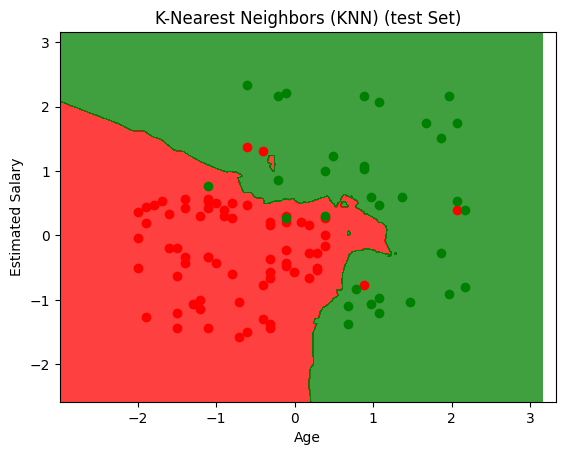

In [9]:
from matplotlib.colors import ListedColormap
# Visualizing the test set results
# Create a custom color map with two colors: red and green
cmap_custom = ListedColormap(['red', 'green'])
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01), 
                     np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap=cmap_custom)
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], 
                c=cmap_custom(i), label=j)

plt.title('K-Nearest Neighbors (KNN) (test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()